In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#matplot 한글폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\GULIM.TTC").get_name()
plt.rc("font", family = font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False

# 서울 자치구별 전월세전환율 2018 - 2022년 까지의 %  dataframe 구축
## 월세가를 아파트 전세가로 변환하여 수치를 동일화 시키기 위함
### 월세에서 전세 전환식 = 월세 보증금 + (월차임 * 12개월) / 지역별 전월세전환율

## 지역별 전월세전환율 Data source 2018~2022
### https://kosis.kr/search/search.do

In [279]:
# 아파트 매매가격 대비 전세가격 비율 2018 - 2022
apt_rent_rate = pd.read_csv(r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/지역별_전월세전환율_2018-2022.csv", encoding='euc-kr')
apt_rent_rate.head()


,주택유형별(1),지역별(1),지역별(2),지역별(3),지역별(4),2018.01,2018.02,2018.03,2018.04,2018.05,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종합,서울,소계,소계,소계,5.3,5.3,5.4,5.4,5.4,...,4.7,4.8,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9
1,종합,서울,강북권역,소계,소계,5.6,5.6,5.7,5.7,5.7,...,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.1,5.2
2,종합,서울,강북권역,도심권,소계,5.7,5.9,5.9,5.9,6.0,...,5.2,5.2,5.2,5.2,5.3,5.2,5.2,5.2,5.2,5.3
3,종합,서울,강북권역,동북권,소계,5.6,5.6,5.7,5.6,5.7,...,5.1,5.2,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2
4,종합,서울,강북권역,서북권,소계,4.5,4.5,4.5,4.6,4.6,...,5.0,5.0,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.2


In [280]:
#불필요한 columns 확인 - '주택유형별(1)', '지역별(1)', '지역별(2)', '지역별(3)'
apt_rent_rate.columns


Index(['주택유형별(1)', '지역별(1)', '지역별(2)', '지역별(3)', '지역별(4)', '2018.01',
       '2018.02', '2018.03', '2018.04', '2018.05', '2018.06', '2018.07',
       '2018.08', '2018.09', '2018.10', '2018.11', '2018.12', '2019.01',
       '2019.02', '2019.03', '2019.04', '2019.05', '2019.06', '2019.07',
       '2019.08', '2019.09', '2019.10', '2019.11', '2019.12', '2020.01',
       '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07',
       '2020.08', '2020.09', '2020.10', '2020.11', '2020.12', '2021.01',
       '2021.02', '2021.03', '2021.04', '2021.05', '2021.06', '2021.07',
       '2021.08', '2021.09', '2021.10', '2021.11', '2021.12', '2022.01',
       '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07',
       '2022.08', '2022.09', '2022.10', '2022.11', '2022.12'],
      dtype='object')

In [281]:
#불필요한 columns 제거 - '주택유형별(1)', '지역별(1)', '지역별(2)', '지역별(3)'

apt_rent_rate.drop(columns=['주택유형별(1)', '지역별(1)',
                   '지역별(2)', '지역별(3)'], inplace=True)
apt_rent_rate


,지역별(4),2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,5.3,5.3,5.4,5.4,5.4,5.4,5.4,5.4,5.4,...,4.7,4.8,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9
1,소계,5.6,5.6,5.7,5.7,5.7,5.7,5.7,5.6,5.6,...,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.1,5.2
2,소계,5.7,5.9,5.9,5.9,6.0,6.0,6.1,5.8,5.7,...,5.2,5.2,5.2,5.2,5.3,5.2,5.2,5.2,5.2,5.3
3,소계,5.6,5.6,5.7,5.6,5.7,5.7,5.7,5.6,5.6,...,5.1,5.2,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2
4,소계,4.5,4.5,4.5,4.6,4.6,4.6,4.7,4.7,4.6,...,5.0,5.0,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.2
5,소계,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.2,...,4.5,4.5,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.7
6,소계,5.6,5.6,5.6,5.6,5.7,5.7,5.6,5.5,5.5,...,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.9
7,소계,5.6,5.6,5.7,5.6,5.7,5.8,5.7,5.7,5.6,...,4.2,4.2,4.2,4.3,4.3,4.3,4.3,4.3,4.3,4.3
8,소계,4.0,4.0,4.0,4.0,4.1,4.1,4.1,4.1,4.0,...,4.2,4.2,4.2,4.2,4.3,4.3,4.3,4.3,4.4,4.4
9,소계,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.3,4.4,4.3,4.4,4.4,4.4,4.4,4.5,4.5,4.6


In [282]:
#시군구 column 자치구별로 변동
apt_rent_rate.rename(columns={'지역별(4)': '자치구별'}, inplace=True)
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,소계,5.3,5.3,5.4,5.4,5.4,5.4,5.4,5.4,5.4,...,4.7,4.8,4.8,4.8,4.9,4.9,4.9,4.9,4.9,4.9
1,소계,5.6,5.6,5.7,5.7,5.7,5.7,5.7,5.6,5.6,...,5.1,5.1,5.1,5.2,5.2,5.2,5.2,5.2,5.1,5.2
2,소계,5.7,5.9,5.9,5.9,6.0,6.0,6.1,5.8,5.7,...,5.2,5.2,5.2,5.2,5.3,5.2,5.2,5.2,5.2,5.3
3,소계,5.6,5.6,5.7,5.6,5.7,5.7,5.7,5.6,5.6,...,5.1,5.2,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2
4,소계,4.5,4.5,4.5,4.6,4.6,4.6,4.7,4.7,4.6,...,5.0,5.0,5.0,5.0,5.0,5.1,5.1,5.1,5.0,5.2


In [283]:
#자치구별 column에서 소계 확인
apt_rent_rate['자치구별'].unique()


array(['소계', '종로', '중', '용산', '성동', '광진', '동대문', '중랑', '성북', '강북', '도봉',
       '노원', '은평', '서대문', '마포', '양천', '강서', '구로', '금천', '영등포', '동작', '관악',
       '서초', '강남', '송파', '강동'], dtype=object)

In [284]:
#자치구별 column에서 소계가 포함된 행 제거
apt_rent_rate = apt_price_rent[apt_price_rent['자치구별'] != '소계']
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [285]:
#데이터프레임 인덱스 리셋
apt_rent_rate.reset_index(drop=True, inplace=True)
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [286]:
#'자치구별' column value에 '구' 추가해서 자치구 이름 변경
addname = apt_rent_rate['자치구별'].unique()

#for 구문으로 '자치구별' value에 '구'추가해주기
addname_gu = [name + '구' for name in addname]
apt_rent_rate['자치구별'] = addname_gu

#결과확인
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [287]:
apt_rent_rate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구별     25 non-null     object 
 1   2018.01  25 non-null     float64
 2   2018.02  25 non-null     float64
 3   2018.03  25 non-null     float64
 4   2018.04  25 non-null     float64
 5   2018.05  25 non-null     float64
 6   2018.06  25 non-null     float64
 7   2018.07  25 non-null     float64
 8   2018.08  25 non-null     float64
 9   2018.09  25 non-null     float64
 10  2018.10  25 non-null     float64
 11  2018.11  25 non-null     float64
 12  2018.12  25 non-null     float64
 13  2019.01  25 non-null     float64
 14  2019.02  25 non-null     float64
 15  2019.03  25 non-null     float64
 16  2019.04  25 non-null     float64
 17  2019.05  25 non-null     float64
 18  2019.06  25 non-null     float64
 19  2019.07  25 non-null     float64
 20  2019.08  25 non-null     float64
 21  2019.09  25 non-nu

In [288]:
#데이터 저장하기
apt_rent_rate.to_csv(
    r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/자치구별_전월세전환율_2018-2022.csv.csv", encoding='utf-8')


In [289]:
#데이터 불러와서 재확인
df = pd.read_csv(r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/자치구별_전월세전환율_2018-2022.csv.csv", encoding='utf-8',index_col=0)

In [290]:
df.head()

,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


# 아파트 전세, 월세 실거래가 전처리

In [291]:
#아파트 전세,월세 실거래가 가져오기 및 필요없는 행 제거
rent_df = pd.read_csv(
    r"C:/Users/acorn/OneDrive/Desktop/중간프로젝트/부동산/아파트(전월세)_실거래가_2018_국토교통부.csv", encoding='euc-kr',
    skiprows=15)
rent_df.head()


C:\Users\acorn\AppData\Local\Temp\ipykernel_14356\2094298918.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  rent_df = pd.read_csv(


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원)
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201803,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201807,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,201802,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201804,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201805,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN


In [292]:
rent_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   시군구            168437 non-null  object 
 1   번지             168365 non-null  object 
 2   본번             168414 non-null  float64
 3   부번             168414 non-null  float64
 4   단지명            168437 non-null  object 
 5   전월세구분          168437 non-null  object 
 6   전용면적(㎡)        168437 non-null  float64
 7   계약년월           168437 non-null  int64  
 8   계약일            168437 non-null  int64  
 9   보증금(만원)        168437 non-null  object 
 10  월세(만원)         168437 non-null  object 
 11  층              168437 non-null  int64  
 12  건축년도           168437 non-null  int64  
 13  도로명            168437 non-null  object 
 14  계약기간           168437 non-null  object 
 15  계약구분           168437 non-null  object 
 16  갱신요구권 사용       168437 non-null  object 
 17  종전계약 보증금 (만원)  0 non-null    

In [293]:
#계약날짜 시계열로 추가하기

rent_df['계약날짜'] = rent_df['계약년월'].astype(str) + rent_df['계약일'].astype(str)
rent_df['계약날짜'] = pd.to_datetime(rent_df['계약날짜'], format='%Y%m%d')
rent_df.head()


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원),계약날짜
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201803,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN,2018-03-29
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201807,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN,2018-07-14
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,201802,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN,2018-02-03
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201804,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN,2018-04-11
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201805,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN,2018-05-15


In [294]:
rent_df.describe()

,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도,종전계약 보증금 (만원),종전계약 월세 (만원)
count,168414.000000,168414.000000,168437.000000,168437.000000,168437.000000,168437.000000,168437.000000,0.0,0.0
mean,571.858224,5.015652,74.497966,201806.554967,16.042598,9.076533,2000.409714,NaN,NaN
std,523.128688,38.839515,29.086064,3.536159,8.796836,6.064827,10.997982,NaN,NaN
min,0.000000,0.000000,10.321500,201801.000000,1.000000,-3.000000,1961.000000,NaN,NaN
25%,169.000000,0.000000,59.400000,201803.000000,9.000000,4.000000,1992.000000,NaN,NaN
50%,488.000000,0.000000,78.050000,201807.000000,16.000000,8.000000,2001.000000,NaN,NaN
75%,800.000000,0.000000,84.960000,201810.000000,24.000000,13.000000,2009.000000,NaN,NaN
max,4950.000000,2837.000000,317.360000,201812.000000,31.000000,68.000000,2022.000000,NaN,NaN


In [295]:
#데이터 프레임 카피 만들기
df1 = rent_df.copy()
df1.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원),계약날짜
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201803,29,"3,865",17,11,1991,개포로109길 5,-,-,-,NaN,NaN,2018-03-29
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201807,14,"3,062",7,9,1991,개포로109길 5,-,-,-,NaN,NaN,2018-07-14
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,201802,3,"39,000",30,4,1988,언주로 103,-,-,-,NaN,NaN,2018-02-03
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201804,11,"52,000",0,9,1988,언주로 103,-,-,-,NaN,NaN,2018-04-11
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201805,15,"50,000",0,5,1988,언주로 103,-,-,-,NaN,NaN,2018-05-15


# 전세, 월세 아파트 전세가로 수치변환
### 아파트 전세 가격일 경우 그대로 전세가로 사용함
### 아파트 월세 가격일 경우
#### 월세를 전세가격으로 변환 후 전세가격
#### 보증금 + (월세 * 12개월) / 자치구별 전월세변환율 = 월세가격 변환

In [296]:
df1.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '보증금(만원)', '월세(만원)', '층', '건축년도', '도로명', '계약기간', '계약구분', '갱신요구권 사용',
       '종전계약 보증금 (만원)', '종전계약 월세 (만원)', '계약날짜'],
      dtype='object')

In [297]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   시군구            168437 non-null  object        
 1   번지             168365 non-null  object        
 2   본번             168414 non-null  float64       
 3   부번             168414 non-null  float64       
 4   단지명            168437 non-null  object        
 5   전월세구분          168437 non-null  object        
 6   전용면적(㎡)        168437 non-null  float64       
 7   계약년월           168437 non-null  int64         
 8   계약일            168437 non-null  int64         
 9   보증금(만원)        168437 non-null  object        
 10  월세(만원)         168437 non-null  object        
 11  층              168437 non-null  int64         
 12  건축년도           168437 non-null  int64         
 13  도로명            168437 non-null  object        
 14  계약기간           168437 non-null  object        
 15  

In [298]:
df1.isnull().sum()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   시군구            168437 non-null  object        
 1   번지             168365 non-null  object        
 2   본번             168414 non-null  float64       
 3   부번             168414 non-null  float64       
 4   단지명            168437 non-null  object        
 5   전월세구분          168437 non-null  object        
 6   전용면적(㎡)        168437 non-null  float64       
 7   계약년월           168437 non-null  int64         
 8   계약일            168437 non-null  int64         
 9   보증금(만원)        168437 non-null  object        
 10  월세(만원)         168437 non-null  object        
 11  층              168437 non-null  int64         
 12  건축년도           168437 non-null  int64         
 13  도로명            168437 non-null  object        
 14  계약기간           168437 non-null  object        
 15  

In [299]:
# 보증금(만원)과 월세(만원) column을 숫자형으로 변환
df1['보증금(만원)'] = df1['보증금(만원)'].str.replace(',', '').astype(int)



In [300]:
df1['월세(만원)'].isnull().sum()


0

In [301]:
#월세 결측치 처리
df1['월세(만원)'] = df1['월세(만원)'].str.replace(',','').fillna(0).astype(int)


In [302]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168437 entries, 0 to 168436
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   시군구            168437 non-null  object        
 1   번지             168365 non-null  object        
 2   본번             168414 non-null  float64       
 3   부번             168414 non-null  float64       
 4   단지명            168437 non-null  object        
 5   전월세구분          168437 non-null  object        
 6   전용면적(㎡)        168437 non-null  float64       
 7   계약년월           168437 non-null  int64         
 8   계약일            168437 non-null  int64         
 9   보증금(만원)        168437 non-null  int32         
 10  월세(만원)         168437 non-null  int32         
 11  층              168437 non-null  int64         
 12  건축년도           168437 non-null  int64         
 13  도로명            168437 non-null  object        
 14  계약기간           168437 non-null  object        
 15  

In [303]:
#월세와 보증금 모두 0인 데이터 확인
zero_rent_deposit_count = ((df1['월세(만원)'] == 0) & (df1['보증금(만원)'] == 0)).sum()
print("월세와 보증금 모두 0인 데이터 개수:", zero_rent_deposit_count)


월세와 보증금 모두 0인 데이터 개수: 21


In [304]:
a = df1['보증금(만원)'].isna().sum()
b = df1['월세(만원)'].isna().sum()
print(a, b)


0 0


In [305]:
#월세와 보증금 모두 0 인 데이터 제거
df1 = df1[(df1['보증금(만원)'] != 0) | (df1['월세(만원)'] != 0)]
df1

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원),계약날짜
0,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201803,29,3865,17,11,1991,개포로109길 5,-,-,-,NaN,NaN,2018-03-29
1,서울특별시 강남구 개포동,12,12.0,0.0,SH대치1단지아파트,월세,25.35,201807,14,3062,7,9,1991,개포로109길 5,-,-,-,NaN,NaN,2018-07-14
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,201802,3,39000,30,4,1988,언주로 103,-,-,-,NaN,NaN,2018-02-03
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201804,11,52000,0,9,1988,언주로 103,-,-,-,NaN,NaN,2018-04-11
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,201805,15,50000,0,5,1988,언주로 103,-,-,-,NaN,NaN,2018-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168432,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,84.03,201812,22,34000,0,4,1997,동일로 752,-,-,-,NaN,NaN,2018-12-22
168433,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,50.37,201812,25,27000,0,20,1997,동일로 752,-,-,-,NaN,NaN,2018-12-25
168434,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,59.76,201812,28,29000,0,13,1997,동일로 752,-,-,-,NaN,NaN,2018-12-28
168435,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),전세,59.76,201812,28,29500,0,9,1997,동일로 752,-,-,-,NaN,NaN,2018-12-28


In [306]:
#월세와 보증금 모두 0인 데이터 확인
zero_rent_deposit_count = ((df1['월세(만원)'] == 0) & (df1['보증금(만원)'] == 0)).sum()
print("월세와 보증금 모두 0인 데이터 개수:", zero_rent_deposit_count)


월세와 보증금 모두 0인 데이터 개수: 0


In [316]:
# 컬럼의 순서(위치) 바꾸기
cols = ['시군구', '전용면적(㎡)', '계약년월','계약날짜', '전월세구분', '보증금(만원)', '월세(만원)']
df2 = pd.DataFrame(df1, columns = cols)
df2


,시군구,전용면적(㎡),계약년월,계약날짜,전월세구분,보증금(만원),월세(만원)
0,서울특별시 강남구 개포동,25.35,201803,2018-03-29,월세,3865,17
1,서울특별시 강남구 개포동,25.35,201807,2018-07-14,월세,3062,7
2,서울특별시 강남구 개포동,77.75,201802,2018-02-03,월세,39000,30
3,서울특별시 강남구 개포동,77.75,201804,2018-04-11,전세,52000,0
4,서울특별시 강남구 개포동,77.75,201805,2018-05-15,전세,50000,0
...,...,...,...,...,...,...,...
168432,서울특별시 중랑구 중화동,84.03,201812,2018-12-22,전세,34000,0
168433,서울특별시 중랑구 중화동,50.37,201812,2018-12-25,전세,27000,0
168434,서울특별시 중랑구 중화동,59.76,201812,2018-12-28,전세,29000,0
168435,서울특별시 중랑구 중화동,59.76,201812,2018-12-28,전세,29500,0


In [317]:
df2.info()
df2['계약년월'].astype(float)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 168416 entries, 0 to 168436
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   시군구      168416 non-null  object        
 1   전용면적(㎡)  168416 non-null  float64       
 2   계약년월     168416 non-null  int64         
 3   계약날짜     168416 non-null  datetime64[ns]
 4   전월세구분    168416 non-null  object        
 5   보증금(만원)  168416 non-null  int32         
 6   월세(만원)   168416 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 9.0+ MB


0         201803.0
1         201807.0
2         201802.0
3         201804.0
4         201805.0
            ...   
168432    201812.0
168433    201812.0
168434    201812.0
168435    201812.0
168436    201801.0
Name: 계약년월, Length: 168416, dtype: float64

c:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


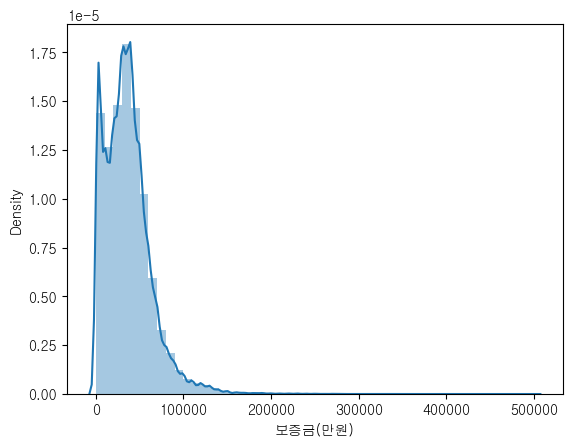

In [319]:
#plt.hist(df2['거래금액(만원)'], bins=30)

sns.distplot(df1['보증금(만원)'], bins = 50)

plt.show()


c:\Users\acorn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월세(만원)', ylabel='Density'>

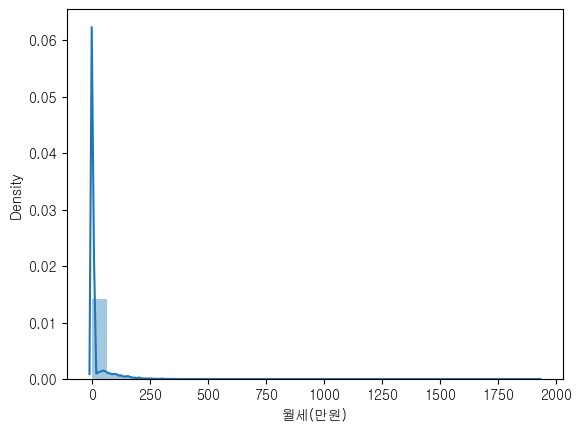

In [310]:
sns.distplot(df1['월세(만원)'], bins=30)


In [321]:
apt_rent_rate.head()


,자치구별,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,종로구구,4.1,4.4,4.5,4.5,4.5,4.8,4.6,4.5,4.6,...,4.3,4.4,4.3,4.1,4.1,4.0,4.1,4.1,4.2,4.4
1,중구구,4.0,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.2,...,4.3,4.3,4.3,4.3,4.4,4.5,4.6,4.8,4.8,4.8
2,용산구구,4.1,4.2,4.2,4.2,4.2,4.2,4.2,4.2,4.2,...,4.7,4.6,4.6,4.6,4.6,4.5,4.5,4.7,4.8,4.7
3,성동구구,4.1,4.1,4.0,4.0,4.0,4.0,4.0,4.0,4.1,...,4.3,4.4,4.4,4.5,4.5,4.5,4.4,4.4,4.6,4.7
4,광진구구,4.0,4.0,3.9,3.8,3.8,3.8,3.8,3.8,3.7,...,4.3,4.3,4.3,4.4,4.3,4.2,4.2,4.4,4.3,4.4


In [ ]:
#### 여기까지

In [311]:
#월세,전세변환금 = 보증금(만원) + (월세(만원) * 12개월) / 지역별 전월세전환율

df2['거래금액(만원)'] = np.where(df2['전월세구분'] == '월세',
                           df2['보증금(만원)'] + df2['월세(만원)']*12, df2['보증금(만원)'])

df2.head()


,시군구,전용면적(㎡),계약년월,계약날짜,전월세구분,보증금(만원),월세(만원),거래금액(만원)
0,서울특별시 강남구 개포동,25.35,201803,2018-03-29,월세,3865,17,4069
1,서울특별시 강남구 개포동,25.35,201807,2018-07-14,월세,3062,7,3146
2,서울특별시 강남구 개포동,77.75,201802,2018-02-03,월세,39000,30,39360
3,서울특별시 강남구 개포동,77.75,201804,2018-04-11,전세,52000,0,52000
4,서울특별시 강남구 개포동,77.75,201805,2018-05-15,전세,50000,0,50000


In [312]:
# 전용면적당 거래금액(만원)
df2['1m^2 전용면적당 거래금액(만원)'] = (df2['거래금액(만원)'] / df2['전용면적(㎡)']).astype(int)
df2.head()


,시군구,전용면적(㎡),계약년월,계약날짜,전월세구분,보증금(만원),월세(만원),거래금액(만원),1m^2 전용면적당 거래금액(만원)
0,서울특별시 강남구 개포동,25.35,201803,2018-03-29,월세,3865,17,4069,160
1,서울특별시 강남구 개포동,25.35,201807,2018-07-14,월세,3062,7,3146,124
2,서울특별시 강남구 개포동,77.75,201802,2018-02-03,월세,39000,30,39360,506
3,서울특별시 강남구 개포동,77.75,201804,2018-04-11,전세,52000,0,52000,668
4,서울특별시 강남구 개포동,77.75,201805,2018-05-15,전세,50000,0,50000,643


In [313]:
#시군구 column 자치구별로 변동
df2.rename(columns = {'시군구':'자치구별'}, inplace = True)

In [274]:
#자치구별 주소 구로만 가져오기
df2['자치구별'] = df2['자치구별'].str.split().str[1]
df2.head()


,자치구별,번지,본번,부번,단지명,전용면적(㎡),계약년월,전월세구분,보증금(만원),월세(만원),거래금액(만원),1m^2 전용면적당 거래금액(만원)
0,강남구,12,12.0,0.0,SH대치1단지아파트,39.53,202203,월세,1457,20,1697,42
1,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202201,전세,64000,0,64000,823
2,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202201,전세,64000,0,64000,823
3,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202203,월세,70000,70,70840,911
4,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202205,전세,54000,0,54000,694


In [275]:
#계약년월 -> 계약연도, 계약월로 나누기
df2['계약연도'] = df2['계약년월'] // 100
df2['계약월'] = df2['계약년월'] % 100


In [276]:
df2.head()

,자치구별,번지,본번,부번,단지명,전용면적(㎡),계약년월,전월세구분,보증금(만원),월세(만원),거래금액(만원),1m^2 전용면적당 거래금액(만원),계약연도,계약월
0,강남구,12,12.0,0.0,SH대치1단지아파트,39.53,202203,월세,1457,20,1697,42,2022,3
1,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202201,전세,64000,0,64000,823,2022,1
2,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202201,전세,64000,0,64000,823,2022,1
3,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202203,월세,70000,70,70840,911,2022,3
4,강남구,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202205,전세,54000,0,54000,694,2022,5


In [277]:
#중간포인트 저장
df2.to_csv(
    r"C:/seokwonna/프로젝트/save_point1_apt_rent_2022_data.csv", encoding='utf-8')


In [278]:
#group_by 사용해서 자치구별 + 계약년월 대비 전용면적당 거래금액(만원) 평균 df으로 구성
df3 = df2.groupby([df2.자치구별, df2.계약월]).mean().round(0)
df3


본번   부번  전용면적(㎡)      계약년월  보증금(만원)  월세(만원)  거래금액(만원)  \
자치구별 계약월                                                             
강남구  1    515.0  3.0     83.0  202201.0  67268.0    82.0   68251.0   
     2    507.0  4.0     80.0  202202.0  65145.0    81.0   66119.0   
     3    461.0  3.0     77.0  202203.0  62715.0    80.0   63674.0   
     4    485.0  4.0     78.0  202204.0  64707.0    87.0   65747.0   
     5    551.0  2.0     77.0  202205.0  55848.0    67.0   56651.0   
...         ...  ...      ...       ...      ...     ...       ...   
중랑구  8    725.0  3.0     61.0  202208.0  23066.0     0.0   23066.0   
     9    868.0  2.0     60.0  202209.0  23626.0     0.0   23626.0   
     10   625.0  4.0     62.0  202210.0  26389.0     0.0   26389.0   
     11   661.0  3.0     53.0  202211.0  17818.0     0.0   17818.0   
     12   636.0  5.0     57.0  202212.0  18263.0     0.0   18263.0   

          1m^2 전용면적당 거래금액(만원)    계약연도  
자치구별 계약월                               
강남구  1                  808.0  2022.0  
     2                  793.0  2022.0  
     3                  759.0  2022.0  
     4                  803.0  2022.0  
     5                  685.0  2022.0  
...                       ...     ...  
중랑구  8                  359.0  2022.0  
     9                  405.0  2022.0  
     10                 428.0  2022.0  
     11                 311.0  2022.0  
     12                 294.0  2022.0  

[300 rows x 9 columns]

In [279]:
unique_values = df2['자치구별'].unique()
print(unique_values)
print(unique_values.size)


['강남구' '강동구' '강북구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구' '도봉구' '동대문구' '동작구'
 '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '종로구' '중구'
 '중랑구']
25


In [280]:
#자치구 월별 매매된 평균 아파트 매매가, 1m^2 전용면적당 평균가
df3.to_csv(
    r"C:/seokwonna/프로젝트/apt_rent_price_2018-22/save_point2_apt_rent_2022_data.csv", encoding='utf-8')


In [281]:
df4 = df2.groupby([df2.자치구별]).mean().round(0)
df4.head()


,본번,부번,전용면적(㎡),계약년월,보증금(만원),월세(만원),거래금액(만원),1m^2 전용면적당 거래금액(만원),계약연도,계약월
자치구별,,,,,,,,,,
강남구,532.0,3.0,80.0,202206.0,65793.0,83.0,66791.0,795.0,2022.0,6.0
강동구,436.0,2.0,66.0,202206.0,36132.0,31.0,36500.0,545.0,2022.0,6.0
강북구,802.0,6.0,60.0,202206.0,23615.0,2.0,23636.0,376.0,2022.0,6.0
강서구,808.0,4.0,62.0,202207.0,29461.0,0.0,29461.0,464.0,2022.0,7.0
관악구,1513.0,7.0,61.0,202207.0,28381.0,0.0,28381.0,441.0,2022.0,7.0


In [282]:
#서울시 수치화된 데이터 평균가 추가
df4.loc['평균'] = df4.mean().round(0)
df4


,본번,부번,전용면적(㎡),계약년월,보증금(만원),월세(만원),거래금액(만원),1m^2 전용면적당 거래금액(만원),계약연도,계약월
자치구별,,,,,,,,,,
강남구,532.0,3.0,80.0,202206.0,65793.0,83.0,66791.0,795.0,2022.0,6.0
강동구,436.0,2.0,66.0,202206.0,36132.0,31.0,36500.0,545.0,2022.0,6.0
강북구,802.0,6.0,60.0,202206.0,23615.0,2.0,23636.0,376.0,2022.0,6.0
강서구,808.0,4.0,62.0,202207.0,29461.0,0.0,29461.0,464.0,2022.0,7.0
관악구,1513.0,7.0,61.0,202207.0,28381.0,0.0,28381.0,441.0,2022.0,7.0
광진구,536.0,5.0,75.0,202206.0,49636.0,0.0,49636.0,641.0,2022.0,6.0
구로구,487.0,14.0,65.0,202206.0,25129.0,0.0,25129.0,370.0,2022.0,6.0
금천구,818.0,5.0,60.0,202206.0,25982.0,0.0,25982.0,438.0,2022.0,6.0
노원구,577.0,1.0,58.0,202206.0,21829.0,0.0,21829.0,347.0,2022.0,6.0


In [283]:
#2018년 자치구별 매매된 평균 아파트 전세 및 월세가, 1m^2 전용면적당 평균가
df4.to_csv(
    r"C:/seokwonna/프로젝트/apt_rent_price_2018-22/save_point3_apt_rent_2022_data.csv", encoding='utf-8')
